In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [11]:
location = 'Taylor Park'
vic_inflow_fn = Path({
    'Blue Mesa': '../data/colorado/basins/gunnison/ro/rout_inflow/Blue_.csv',
    'Morrow Point': '../data/colorado/basins/gunnison/ro/rout_inflow/Morro.csv',
    'Silver Jack': '../data/colorado/basins/gunnison/ro/rout_inflow/Silve.csv',
    'Taylor Park': '../data/colorado/basins/gunnison/ro/rout_inflow/Silve.csv'
}[location])
observed_fn = Path({
    'Blue Mesa': '../data/obs_data/ResOpsUS_541.csv',
    'Morrow Point': '../data/obs_data/ResOpsUS_542.csv',
    'Silver Jack': '../data/obs_data/ResOpsUS_549.csv',
    'Taylor Park': '../data/obs_data/ResOpsUS_536.csv'
}[location])

vic_inflow = pd.read_csv(vic_inflow_fn, parse_dates=['date']).set_index('date')

observed = pd.read_csv(observed_fn, parse_dates=['date']).set_index('date')[['inflow']]
observed

,inflow
date,
1958-10-01,NaN
1958-10-02,NaN
1958-10-03,NaN
1958-10-04,NaN
1958-10-05,NaN
...,...
2021-01-23,1.891
2021-01-24,1.877
2021-01-25,1.677


In [12]:
date_range = pd.date_range('2019-01-01', '2021-01-27')

df = pd.DataFrame()
df['date'] = date_range
df.set_index('date', inplace=True)

df['vic_inflow'] = vic_inflow.loc[date_range, 'streamflow']
df['obs_inflow'] = observed.loc[date_range, 'inflow']

Text(0.5, 1.0, 'Taylor Park inflow')

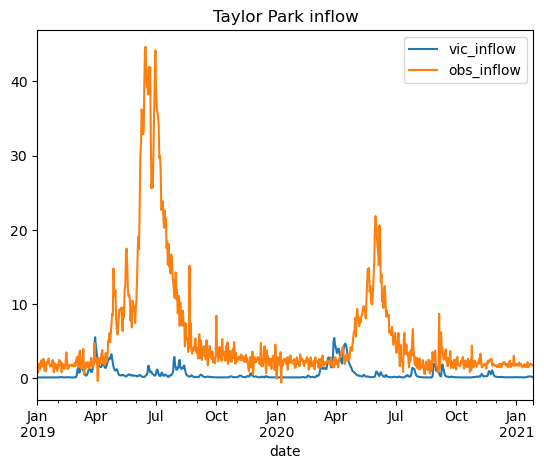

In [13]:
import matplotlib.pyplot as plt

df.plot()
plt.title(f'{location} inflow')